# Приоритизация гипотез и анализ результатов A/B теста

**Описание данных**

Данные для первой части

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Описание проекта**

Имея список гипотез для увеличения выручки необходимо приоритезировать данные гипотезы, запустить A/B-тест и проанализировать результаты.

**Задачи:**
- Приоритизировать гипотезы для увеличения выручки крупного интернет-магазина из подготовленного с отделом маркетинга списка.
- Запустить A/B-тест.
- Проанализировать результаты.

In [ ]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime as dt


# отключим предупреждения
import warnings
warnings.simplefilter('ignore')

pd.options.display.float_format = '{:,.2f}'.format

## Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Для приоритизации применим фреймворки ICE и RICE.

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Фреймворк ICE

In [ ]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

print((hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)).round(2))

                                          hypothesis   ICE
8  Запустить акцию, дающую скидку на товар в день... 16.20
0  Добавить два новых канала привлечения трафика,... 13.33
7  Добавить форму подписки на все основные страни... 11.20
6  Показать на главной странице баннеры с актуаль...  8.00
2  Добавить блоки рекомендаций товаров на сайт ин...  7.00
1  Запустить собственную службу доставки, что сок...  2.00
5  Добавить страницу отзывов клиентов о магазине,...  1.33
3  Изменить структура категорий, что увеличит кон...  1.12
4  Изменить цвет фона главной страницы, чтобы уве...  1.00


### Фреймворк RICE

In [ ]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни... 112.00
2  Добавить блоки рекомендаций товаров на сайт ин...  56.00
0  Добавить два новых канала привлечения трафика,...  40.00
6  Показать на главной странице баннеры с актуаль...  40.00
8  Запустить акцию, дающую скидку на товар в день...  16.20
3  Изменить структура категорий, что увеличит кон...   9.00
1  Запустить собственную службу доставки, что сок...   4.00
5  Добавить страницу отзывов клиентов о магазине,...   4.00
4  Изменить цвет фона главной страницы, чтобы уве...   3.00


### Вывод:
При применении ICE наиболее перспективные гипотезы 8, 0, 7 и 6, а RICE показывает, что на первом месте уже гипотеза 7, потом 2,0 и 6. Это произошло потому что параметр охвата у гипотезы 7 намного выше. То есть эти изменения затронут большее количество пользователей.

## Анализ A/B-теста

Результаты A/B-теста описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
orders.columns = orders.columns.str.lower()
orders.head(5)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
orders.info() #изучим типы данных orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
#Преобразуем тип даных с датой в datetime
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d")

In [ ]:
#изучим общее описание набора данных orders
orders.describe() 

,transactionid,visitorid,revenue
count,"1,197.00","1,197.00","1,197.00"
mean,"2,155,621,385.53","2,165,960,143.10","8,348.01"
std,"1,229,084,904.76","1,236,014,192.15","39,191.13"
min,"1,062,393.00","5,114,589.00",50.00
25%,"1,166,775,572.00","1,111,826,046.00","1,220.00"
50%,"2,145,193,898.00","2,217,984,702.00","2,978.00"
75%,"3,237,740,112.00","3,177,606,451.00","8,290.00"
max,"4,293,855,558.00","4,283,872,382.00","1,294,500.00"


In [ ]:
#получим суммарное кол-во нулевых значений orders
orders.isnull().sum() 

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [ ]:
#получим суммарное кол-во дубликатов orders
orders.duplicated().sum()

0

In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
#Преобразуем тип даных с датой в datetime
visitors['date'] = pd.to_datetime(visitors['date'], format="%Y-%m-%d")

In [ ]:
visitors.describe() 

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


In [ ]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [ ]:
visitors.duplicated().sum() #получим суммарное кол-во дубликатов visitors

0

### Куммулятивная выручка¶

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# Получим строки orders, дата которых <= дате элемента из datesGroups, а группа теста равна группе из datesGroups
# Агрегируем значения, найдём число уникальных ID заказов и пользователей
# Подсчитаем сумму средних чеков

ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
)

# Получим нужные строки visitors, агрегируем значения
# Посчитаем количество пользователей

visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#print(cummulativeData.head(5))
display(cummulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим график выручки группы A и группы B

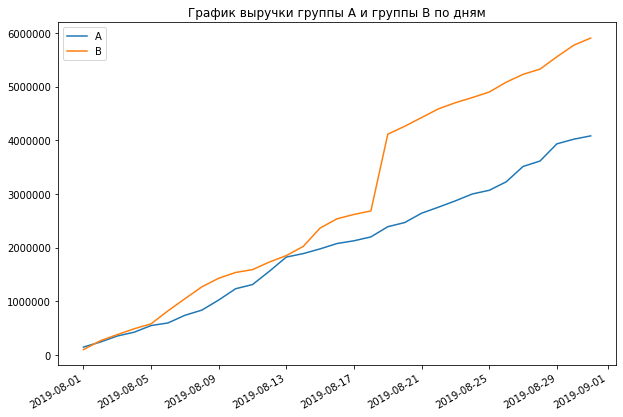

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и B
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]


cummulativeRevenueA['date'] = pd.to_datetime(cummulativeRevenueA['date'], format='%Y-%m-%d')
cummulativeRevenueB['date'] = pd.to_datetime(cummulativeRevenueB['date'], format='%Y-%m-%d')


# Строим график выручки группы А и B

fig = plt.figure(figsize=[10,7])


plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

fig.autofmt_xdate()

plt.title("График выручки группы A и группы B по дням")

plt.legend()
plt.show()

Выручка увеличивается в течение всего теста, но график выручки группы B в одной точке резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

### Куммулятивный средний чек

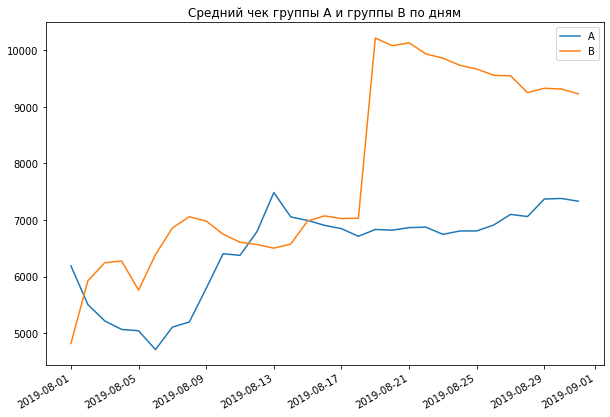

In [ ]:
fig = plt.figure(figsize=[10,7])
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
fig.autofmt_xdate()
plt.title("Средний чек группы A и группы B по дням")
plt.legend()
plt.show()

Средний чек становится более равномерным к концу теста: немного растет для группы A и и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике).

### Относительное изменение кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline():

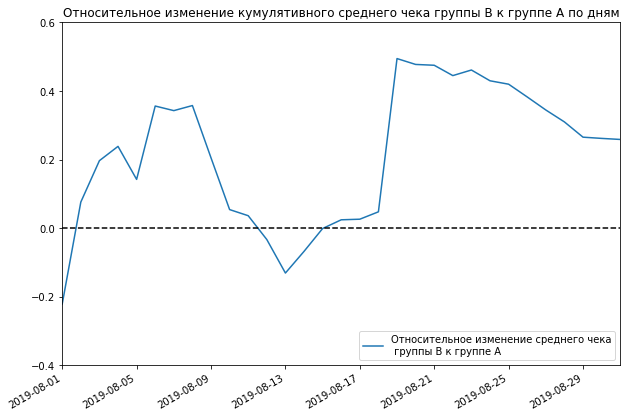

In [ ]:
fig = plt.figure(figsize=[10,7])
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1, label="Относительное изменение среднего чека\n группы B к группе A")
plt.legend(loc='lower right')
fig.autofmt_xdate()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A по дням")
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.6])
plt.show()

График различия между сегментами резко «скачет». Сначала средний чек группы B стабильно растет, потом резко падает и резко взлетает. Возможно это влияние крупных заказов и выбросов. Все три графика демонстрируют одинаковую картину.

### Кумулятивная конверсия

Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis().

In [ ]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
print(cummulativeData['conversion'].min())
print(cummulativeData['conversion'].max())

0.029217427214536445
0.03685636856368564


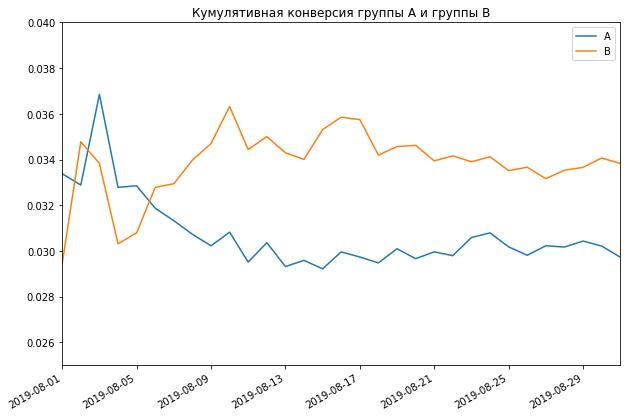

In [ ]:
cummulativeData['date'] = pd.to_datetime(cummulativeData['date'], format='%Y-%m-%d')

# отделяем данные по группе A и B
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']


# строим графики
fig = plt.figure(figsize=[10,7])
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
fig.autofmt_xdate()
plt.legend()

plt.title("Кумулятивная конверсия группы А и группы B")
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.040])
plt.show()

Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

### Относительное изменение кумулятивной конверсии группы B к группе A

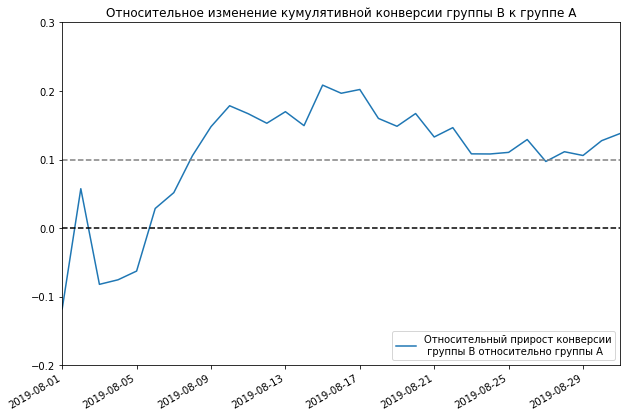

In [ ]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=[10,7])
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии\n группы B относительно группы A")
plt.legend(loc="lower right")
fig.autofmt_xdate()

plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3])

plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Конверсия группы B стабильно выше. Стоит проанализировать аномалии, возможно результаты изменятся.

### Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [ ]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})

ordersByUsers.columns = ['visitorid','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Построим гистрограмму распределения количества заказов на одного пользователя.

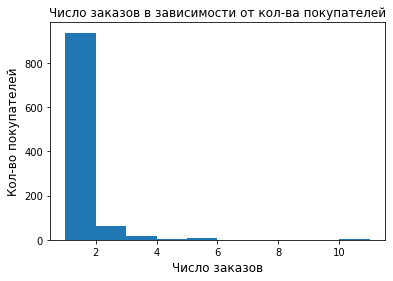

In [ ]:
plt.hist(ordersByUsers['orders'])
plt.title("Число заказов в зависимости от кол-ва покупателей")
plt.xlabel('Число заказов',fontsize = 12) #xlabel
plt.ylabel('Кол-во покупателей', fontsize = 12)#ylabel
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна. Построим точечную диаграмму числа заказов на одного пользователя:

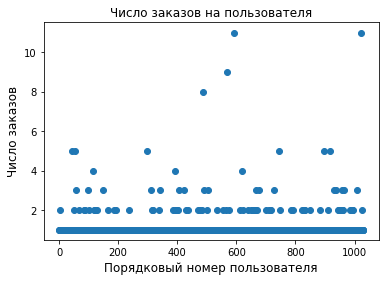

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title("Число заказов на пользователя")
plt.xlabel('Порядковый номер пользователя',fontsize = 12)
plt.ylabel('Число заказов', fontsize = 12)

plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Выводы подтверждаются: есть пользователи с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа.

Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов

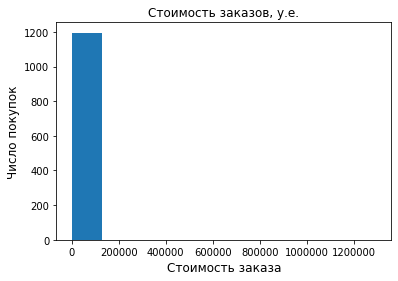

In [ ]:
plt.hist(orders['revenue'])

plt.title("Стоимость заказов, у.е.")
plt.xlabel('Стоимость заказа',fontsize = 12)
plt.ylabel('Число покупок', fontsize = 12)

plt.show()

In [ ]:
orders['revenue'].describe()

count       1,197.00
mean        8,348.01
std        39,191.13
min            50.00
25%         1,220.00
50%         2,978.00
75%         8,290.00
max     1,294,500.00
Name: revenue, dtype: float64

Три четверти стоимостей заказов находятся в пределах 10000.

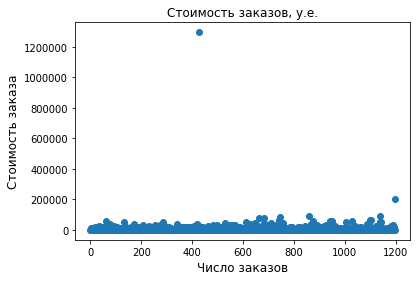

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.title("Стоимость заказов, у.е.")
plt.xlabel('Число заказов',fontsize = 12)
plt.ylabel('Стоимость заказа', fontsize = 12)

plt.scatter(x_values, orders['revenue'])

Практически все стоимости заказов находятся в пределах 100000, но есть выбросы со стоимостями более миллиона. Именно этот заказ отразился на всех графиках.

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Менее 5% заказов стоят дороже 28000, можно взять эту цифру за границу для определения аномальных заказов

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

In [ ]:
# Считаем количество пользователей до выбранной даты включительно в группах A и B;

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Считаем суммарное число заказов до выбранной даты включительно в группах A и B
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


# Получаем таблицу с количеством заказов, выручкой в день, количество заказов и выручка до выбранной даты(включительно)
# Количество пользователей до выбранной даты 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [ ]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Подготовим выборки к проверке критерием Манна-Уитни. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [ ]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [ ]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


P-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем.

По «сырым» данным есть различия в конверсии групп A и B. Относительная развница в конверсиях около 14% (прирост группы B)

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов и найдём относительные различия в среднем чеке между группами:

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.05. Значит, нельзя отвегнуть нулевую гипотезу. В среднем чеке заказа между группами различий нет.

Впрочем, средний чек группы B почти на 26% выше среднего чека группы A.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

За аномальных пользователей были приняты те, кто совершил от 3 заказов или совершил заказ дороже 28000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape()

In [ ]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей: {}".format(abnormalUsers.shape))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Всего аномальных пользователей: (74,)


Всего 74 аномальных пользователя. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [ ]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.173


Результаты по конверсии практически не изменились. p-value остался значительно меньше 0.05. 
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем.

По очищенным данным есть статистически значимые различия в конверсии групп A и B. Относительный прирост конверсии группы B около 17%

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.369
-0.020


P-value практически не изменился, а разница между сегментами сильно изменилась. Очищенные данные показывают, что средний чек группы B немного уступает группе A, в то время как на сырых данных чек группы B был на 26% больше.

По очищенным данным статистически значимых различий среднего чека между группами нет.

Хотя статистической зачимости и нет, стоит отметить, что разница из положительной стала отрицательной - это дополнительно показывает вклад аномалии.

## Результаты A/B теста

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Как по сырым, так и по очищенным данным нет статистически значимого различия по среднему чеку между группами.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту и практически зафиксировались.
- График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.

### Решение

На основании результатов, можно остановить тест и зафиксировать победу группы **B**. Так как есть статистически значимое различие по конверсии между группами, относительный прирост конверсии группы B около 17%.